In [5]:
%run '00_database_connectivity_setup.ipynb'

In [8]:
%%showsql
SELECT count(*) FROM sudip.material_features_distance_components LIMIT 100

,count
0,158535721


In [10]:
%%execsql
DROP TABLE IF EXISTS nate.ewhg_hcs0_distance_sum;
select madlib.summary('nate.material_features_distance_ewhg_hcs0','nate.ewhg_hcs0_distance_sum')

In [11]:
%%showsql
select * from nate.ewhg_hcs0_distance_sum

,group_by,group_by_value,target_column,column_number,data_type,row_count,distinct_values,missing_values,blank_values,fraction_missing,fraction_blank,mean,variance,min,max,first_quartile,median,third_quartile,most_frequent_values,mfv_frequencies
0,None,None,material,1,text,56700900,7530,0,0.0,0.0,0.0,NaN,NaN,7.0,14.00000,NaN,NaN,NaN,"[P1000022861, P1000009303, P181367, P1000103831, 701-077-424, P183911, DP-79-0429, P137574-1039, P132339-0019, P1000056404]","[60240, 52710, 52710, 52710, 52710, 52710, 52710, 45180, 45180, 45180]"
1,None,None,similar_material,2,text,56700900,7571,0,0.0,0.0,0.0,NaN,NaN,7.0,14.00000,NaN,NaN,NaN,"[P145965, P106917-0003, P1000035836, P182953, P159824, P107874, P145965, P106917-0003, P1000035836, P182953]","[67770, 67770, 67770, 67770, 67770, 67770, 67770, 67770, 67770, 67770]"
2,None,None,score,3,float8,56700900,16953026,0,NaN,0.0,NaN,0.781975,0.004835,0.0,1.00393,0.74164,0.790035,0.826272,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[821371, 821371, 821371, 821371, 821371, 821371, 821371, 821371, 821371, 821371]"


In [9]:
%%showsql
select
    ntile,
    min(score) as min_gower_dissimilarity_score,
    max(score) as max_gower_dissimilarity_score,
    avg(score) as mean_gower_dissimilarity_score
from
(
    select
        ntile(200) over( order by score) as ntile,
        score
    from
    (
        select
            score
        from
           sudip.material_features_distance_components
        where
           material > similar_material
        order by random()
        -- Take 100K random pairs of points
        limit 100000
    )q1
)q2
group by ntile
order by ntile

,ntile,min_gower_dissimilarity_score,max_gower_dissimilarity_score,mean_gower_dissimilarity_score
0,1,0.311799,0.554147,0.499947
1,2,0.554217,0.586420,0.570106
2,3,0.586420,0.606293,0.597407
3,4,0.606328,0.620966,0.612975
4,5,0.621038,0.629179,0.625948
5,6,0.629179,0.634005,0.631426
6,7,0.634029,0.639456,0.636959
7,8,0.639456,0.645503,0.642251
8,9,0.645518,0.652676,0.649087
9,10,0.652692,0.657641,0.655293


In [10]:
sql = """
    select
        score
    from
        sudip.material_features_distance_components
    where
        material > similar_material and score<20
    order by random()
    -- Take 100K random pairs of points
    limit 100000;
"""
df = psql.read_sql(sql, conn)
conn.commit()

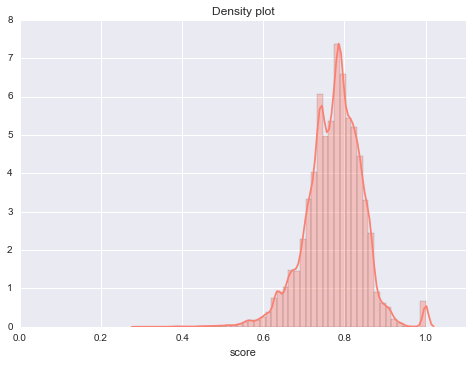

In [11]:
import seaborn as sns
sns.distplot(df['score'], color='salmon')
sns.plt.title('Density plot')
sns.plt.xlim(0)
sns.plt.show()

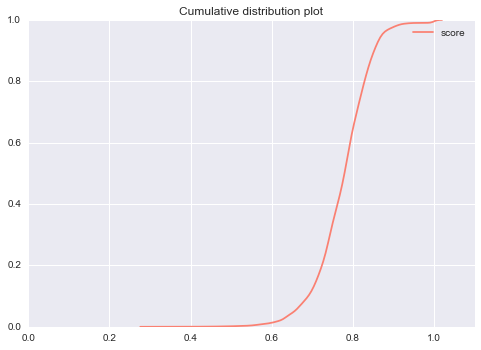

In [12]:
import seaborn as sns
kde = sns.kdeplot(df['score'], cumulative=True, color='salmon')
sns.plt.title('Cumulative distribution plot')
sns.plt.xlim(0)
sns.plt.show()

In [ ]:
threshold_hclust = 0.6 # for the above graphs

In [45]:
%%execsql
--1) Define return type (material, cluster_number)
drop type if exists nate.hclust_results_type cascade;
create type nate.hclust_results_type
as
(
    material text,
    cluster_number int
);

--2) SFUNC
drop function if exists nate.stack_rows(
    text,
    text[],
    text,
    text,
    float8
) cascade;
create or replace function nate.stack_rows(
    key text,
    header text[],
    material text,
    similar_material text,
    score float8
)
returns text
as
$$
    if 'header' not in GD:
        GD['header'] = header
    if not key:
        gd_key = 'stack_large_array'
        GD[gd_key] = [[material, similar_material, score]]
        return gd_key
    else:
        GD[key].append([material, similar_material, score])
        return key
$$language plpythonu;

--3) Define UDA
drop aggregate if exists nate.stack_rows( 
    text[],
    text, 
    text, 
    float8
) cascade;
create ordered aggregate nate.stack_rows(
        text[], -- header
        text, -- material
        text, -- similar_material
        float8 -- score
    )
(
    SFUNC = nate.stack_rows,
    STYPE = text -- the key in GD used to hold the data across calls
);

--4) Define UDF to retrieve the data from the key in GD and run hierarchical clustering
drop function if exists nate.run_hclust(text, float8) cascade;
create or replace function nate.run_hclust(key text, threshold float8)
returns setof nate.hclust_results_type
as
$$    
    import numpy as np
    import scipy.cluster.hierarchy as hcl
    from scipy.cluster.hierarchy import fcluster
    from scipy.spatial.distance import squareform    
    import pandas as pd    
    if key in GD:     
        df = pd.DataFrame(GD[key], columns=GD['header'])                
        data_piv = df.pivot(*GD['header']).fillna(0)        
        
        piv_arr = data_piv.as_matrix()
        dist_mat = piv_arr + np.transpose(piv_arr)
        
        #Complete linkage hierarchical clustering (w/ pre-computed Gower's distances)
        hclust_results = hcl.linkage(squareform(dist_mat), method='complete')
                
        clusters = fcluster(hclust_results, threshold, criterion='distance')
        cluster_allocation = pd.DataFrame(       
            zip(sorted(list(set(df[GD['header'][0]]))), clusters), 
            columns=['material','cluster_number']
        )
        result = cluster_allocation.values.tolist()
         
        del GD[key]
        return result
    else:
        plpy.info('returning None')
        return None        
    
$$ language plpythonu;

In [17]:
# actually medium, ran with 0.63
sql = """
drop table if exists nate.hclust_results;
create table nate.hclust_results
as
(
    select (result).material, (result).cluster_number
    from
    (
        select nate.run_hclust(key, 0.63) as result 
        from 
        (
            select
                nate.stack_rows( ARRAY['material', 'similar_material', 'score'],
                    material, 
                    similar_material, 
                    score) as key
            from sudip.material_features_distance_components
            where  material >= similar_material              
        ) q1
    ) q2
) distributed by (material);
"""
    
psql.execute(sql, conn)
conn.commit()

In [5]:
# actually small, ran with 0.60
sql = """
drop table if exists nate.hclust_medium_results;
create table nate.hclust_medium_results
as
(
    select (result).material, (result).cluster_number
    from
    (
        select nate.run_hclust(key, 0.60) as result 
        from 
        (
            select
                nate.stack_rows( ARRAY['material', 'similar_material', 'score'],
                    material, 
                    similar_material, 
                    score) as key
            from sudip.material_features_distance_components
            where  material >= similar_material              
        ) q1
    ) q2
) distributed by (material);
"""
    
psql.execute(sql, conn)
conn.commit()

In [4]:
# actually small, ran with 0.50
sql = """
drop table if exists nate.hclust_small_results;
create table nate.hclust_small_results
as
(
    select (result).material, (result).cluster_number
    from
    (
        select nate.run_hclust(key, 0.50) as result 
        from 
        (
            select
                nate.stack_rows( ARRAY['material', 'similar_material', 'score'],
                    material, 
                    similar_material, 
                    score) as key
            from sudip.material_features_distance_components
            where  material >= similar_material              
        ) q1
    ) q2
) distributed by (material);
"""
    
psql.execute(sql, conn)
conn.commit()

In [3]:
# actually large, ran with 0.70
sql = """
drop table if exists nate.hclust_large_results;
create table nate.hclust_large_results
as
(
    select (result).material, (result).cluster_number
    from
    (
        select nate.run_hclust(key, 0.70) as result 
        from 
        (
            select
                nate.stack_rows( ARRAY['material', 'similar_material', 'score'],
                    material, 
                    similar_material, 
                    score) as key
            from sudip.material_features_distance_components
            where  material >= similar_material              
        ) q1
    ) q2
) distributed by (material);
"""
    
psql.execute(sql, conn)
conn.commit()

In [13]:
# actually large, ran with 0.75
sql = """
drop table if exists nate.hclust_largest_results;
create table nate.hclust_largest_results
as
(
    select (result).material, (result).cluster_number
    from
    (
        select nate.run_hclust(key, 0.75) as result 
        from 
        (
            select
                nate.stack_rows( ARRAY['material', 'similar_material', 'score'],
                    material, 
                    similar_material, 
                    score) as key
            from sudip.material_features_distance_components
            where  material >= similar_material              
        ) q1
    ) q2
) distributed by (material);
"""
    
psql.execute(sql, conn)
conn.commit()

DatabaseError: Execution failed on sql: 
drop table if exists nate.hclust_largest_results;
create table nate.hclust_largest_results
as
(
    select (result).material, (result).cluster_number
    from
    (
        select nate.run_hclust(key, 0.75) as result 
        from 
        (
            select
                nate.stack_rows( ARRAY['material', 'similar_material', 'score'],
                    material, 
                    similar_material, 
                    score) as key
            from sudip.material_features_distance_components
            where  material >= similar_material              
        ) q1
    ) q2
) distributed by (material);

server closed the connection unexpectedly
	This probably means the server terminated abnormally
	before or while processing the request.

unable to rollback

In [7]:
%%showsql 
select cluster_number,count(*) from nate.hclust_small_results group by cluster_number order by 2 desc ;

,cluster_number,count
0,4488,73
1,3887,70
2,3893,69
3,3348,54
4,3884,42
5,4342,38
6,3315,34
7,3908,33
8,3320,31
9,3340,29


In [8]:
%%showsql 
select cluster_number,count(*) from nate.hclust_medium_results group by cluster_number order by 2 desc ;

,cluster_number,count
0,2587,164
1,2296,159
2,2300,140
3,2298,79
4,275,77
5,1111,70
6,2531,65
7,2013,60
8,2018,55
9,2002,53


In [3]:
%%showsql 
select cluster_number,count(*) from nate.hclust_results group by cluster_number order by 2 desc ;

,cluster_number,count
0,2098,164
1,1872,159
2,1876,140
3,2058,120
4,909,112
5,1874,79
6,218,78
7,1653,60
8,1657,59
9,1645,53


In [10]:
%%showsql 
select cluster_number,count(*) from nate.hclust_large_results group by cluster_number order by 2 desc ;

,cluster_number,count
0,960,267
1,1049,238
2,1063,181
3,961,178
4,483,116
5,866,109
6,107,108
7,867,105
8,320,90
9,222,85


In [34]:
%%showsql 
select cluster_number,count(*) from nate.hclust_largest_results group by cluster_number order by 2 desc ;

,cluster_number,count
0,546,267
1,597,260
2,505,214
3,547,192
4,604,181
5,31,144
6,358,143
7,506,143
8,292,119
9,64,108


In [39]:
%%showsql 
select cluster_number,count(*),array_agg(distinct pctreplaced) 
FROM nate.full_features a
JOIN nate.hclust_largest_results b
ON a.component = b.material
group by cluster_number order by 2 desc;

,cluster_number,count,array_agg
0,604,1569,"[0E-20, 0.01098901098901098901, 0.01204819277108433735, 0.01818181818181818182, 0.03571428571428571429, 0.03703703703703703704, 0.08333333333333333333, 0.08571428571428571429, 0.23809523809523809524]"
1,547,634,"[0E-20, 0.01098901098901098901, 0.01204819277108433735, 0.03571428571428571429, 0.03703703703703703704]"
2,360,584,"[0E-20, 0.01204819277108433735, 0.01923076923076923077, 0.03571428571428571429, 0.03703703703703703704, 0.08571428571428571429]"
3,358,578,"[0E-20, 0.00813008130081300813]"
4,546,455,"[0E-20, 0.01204819277108433735, 0.03571428571428571429, 0.03703703703703703704]"
5,293,442,"[0E-20, 0.01204819277108433735, 0.01818181818181818182, 0.03571428571428571429, 0.03703703703703703704]"
6,597,338,"[0E-20, 0.01098901098901098901, 0.01204819277108433735, 0.03571428571428571429, 0.03703703703703703704, 0.23809523809523809524]"
7,622,305,[0E-20]
8,292,271,[0E-20]
9,169,238,"[0E-20, 0.01204819277108433735, 0.01818181818181818182, 0.03571428571428571429, 0.03703703703703703704]"


NOTE - CLUSTER TABLES HAVE DUPLICATE ROWS FOR MATERIALS, NEED TO SELECT DISTINCT AND ADJUST APPROPRIATELY, LIKE BELOW TO GET RID OF

In [52]:
%%showsql 
select distinct cluster_number, a.component, sum(orders_serviced), 
sum(orders_replaced), sum(orders_replaced)/sum(orders_serviced) 
FROM nate.full_features a
JOIN nate.hclust_largest_results b
ON a.component = b.material
WHERE orders_replaced <> 0
GROUP BY cluster_number, a.component
ORDER BY 1 DESC;


,cluster_number,component,sum,sum,?column?
0,607,P207139,756.0,27.0,0.035714
1,605,48-081-039,84.0,3.0,0.035714
2,604,48-080-043,224.0,8.0,0.035714
3,604,48-080-089,11122.0,134.0,0.012048
4,604,48-081-005,287.0,11.0,0.038328
5,604,48-081-073,3444.0,123.0,0.035714
6,604,48-081-086,5016.0,156.0,0.031100
7,604,48-081-447,224.0,8.0,0.035714
8,604,48-081-455,3888.0,144.0,0.037037
9,604,48-082-091,249.0,6.0,0.024096


Get for within each cluster: mean and stdev for replaced, serviced
use all three in prediction as features

Also add to feature table: material type, dates, other

Use mean/stdev to rate each cluster and also be attentive to lower sample sizes for clusters, low cluster sizes, perhaps change the clustering settings

Look for trends as you change the threshold_clust variables to get the clusters most accurate for predicting probability replaced

In [48]:
%%showsql
SELECT a.cluster_number, avg(b.orders_replaced), avg(b.orders_serviced), avg(pctreplaced),
 stddev(b.orders_replaced), stddev(b.orders_serviced), stddev(pctreplaced)
FROM nate.hclust_small_results a
JOIN nate.replacedvsserviced b 
ON a.material = b.component
GROUP BY a.cluster_number


,cluster_number,avg,avg,avg,stddev,stddev,stddev
0,779,0.000000,1.000000,0.000000,NaN,NaN,NaN
1,3326,1.000000,30.000000,0.033333,1.414214,0.000000,0.047140
2,1756,0.000000,13.000000,0.000000,NaN,NaN,NaN
3,4059,0.000000,3.000000,0.000000,NaN,NaN,NaN
4,2513,0.000000,4.000000,0.000000,NaN,NaN,NaN
5,1381,0.000000,21.000000,0.000000,NaN,NaN,NaN
6,4537,2.000000,3.000000,0.666667,NaN,NaN,NaN
7,4413,0.000000,7.000000,0.000000,NaN,NaN,NaN
8,3051,2.000000,34.000000,0.058824,NaN,NaN,NaN
9,2564,0.000000,34.000000,0.000000,NaN,NaN,NaN


In [47]:
%%execsql
DROP TABLE IF EXISTS nate.cluster_master;
CREATE TABLE nate.cluster_master AS (SELECT DISTINCT a.material,
                                     a.cluster_number as c1, b.cluster_number as c2,
                                     c.cluster_number as c3, d.cluster_number as c4,
                                     e.cluster_number as c5 FROM nate.hclust_small_results a
    JOIN nate.hclust_medium_results b ON a.material = b.material
    JOIN nate.hclust_results c ON a.material = c.material
    JOIN nate.hclust_large_results d ON a.material = d.material
    JOIN nate.hclust_largest_results e ON a.material = e.material)
    

In [37]:
%%showsql
SELECT DISTINCT a.material, pctreplaced 
FROM nate.cluster_master b
JOIN nate.full_features a
ON b.material = a.component OR b.material = a.material
WHERE c4 = 222

,material,pctreplaced
0,P1000039986,0.000000
1,P165491,0.000000
2,P156615,0.000000
3,P120000-1021,0.000000
4,P161912,0.010989
5,P1000102295,0.000000
6,P180474,0.000000
7,P1000040355,0.000000
8,P152346,0.000000
9,P161989,0.000000


START PREDICTIVE MODEL

In [57]:
%%execsql

CREATE OR REPLACE FUNCTION my_to_date(text, text) RETURNS date AS $$

BEGIN
    IF to_number($1,'99999999') = 0 THEN
        RETURN null;
    ELSE 
        RETURN to_date($1, $2);
    END IF;
END;

$$ LANGUAGE plpgsql

In [1]:
%%execsql
DROP TABLE IF EXISTS nate.prediction_input;
CREATE TABLE nate.prediction_input AS
SELECT component, material, orders_replaced, orders_serviced, pctreplaced, leadtimecalday, 
my_to_date(actstart, 'YYYYMMDD') as actstart, ABCinc, bic_zphase::int, (material_coatingspecs is not null) as matl_has_coatings,
(material_documents is not null) as matl_has_documents, (material_matlspecs is not null) 
as matl_has_matlspecs,
(material_weldspecs is not null) as matl_has_weldspecs, (material_qspecs is not null) 
as matl_has_qspecs, (component_coatingspecs is not null) as has_coatings,
(component_documents is not null) as has_documents, (component_matlspecs is not null) 
as has_matlspecs,
(component_weldspecs is not null) as has_weldspecs, (component_qspecs is not null) 
as has_qspecs, 
material_weight, material_surface_matl, material_subsea_matl, component_weight, component_surface_matl, 
component_subsea_matl,
b.*
FROM nate.full_features a
inner join nate.cluster_master b on a.component=b.material



ERROR: Cell magic `%%execsql` not found.


In [125]:
%%execsql
create or replace function b2t (boolean)
returns char
strict
language sql as '
select case
when $1 then \'True\'
else \'False\'
end;
';

In [126]:
%%execsql
DROP TABLE IF EXISTS nate.prediction_input_dectreefix;
CREATE TABLE nate.prediction_input_dectreefix AS
SELECT component, orders_replaced, orders_serviced, pctreplaced, leadtimecalday, 
my_to_date(actstart, 'YYYYMMDD') as actstart, ABCinc, bic_zphase::int, b2t((material_coatingspecs is not null)) as matl_has_coatings,
b2t((material_documents is not null)) as material_has_documents, b2t((material_matlspecs is not null)) 
as matl_has_matlspecs,
(b2t(material_weldspecs is not null)) as matl_has_weldspecs, (b2t(material_qspecs is not null)) 
as matl_has_qspecs, (b2t(component_coatingspecs is not null)) as has_coatings,
(b2t(component_documents is not null)) as has_documents, (b2t(component_matlspecs is not null)) as has_matlspecs,
(b2t(component_weldspecs is not null)) as has_weldspecs, (b2t(component_qspecs is not null)) 
material_weight, b2t(material_surface_matl) as material_surface_matl, 
b2t(material_subsea_matl) as material_subsea_matl, 
                                                component_weight,
    b2t(component_surface_matl) as component_surface_matl, b2t(component_subsea_matl)
    as component_subsea_matl
FROM nate.full_features

In [65]:
test = """1,leadtimecalday, actstart, bic_zphase, matl_has_coatings, matl_has_documents, 
matl_has_matlspecs, matl_has_weldspecs, matl_has_qspecs, has_coatings, has_matlspecs, 
has_weldspecs, has_qspecs, material_weight, component_weight"""

In [69]:
test

'1,leadtimecalday, actstart, bic_zphase, matl_has_coatings, matl_has_documents, \nmatl_has_matlspecs, matl_has_weldspecs, matl_has_qspecs, has_coatings, has_matlspecs, \nhas_weldspecs, has_qspecs, material_weight, component_weight'

In [83]:
%%execsql
DROP TABLE IF EXISTS nate.regr_output;
DROP TABLE IF EXISTS nate.regr_output_summary;

In [84]:
%%execsql
SELECT madlib.linregr_train('nate.prediction_input', 'nate.regr_output', 'pctreplaced', 
                            'ARRAY[1, material_weight, component_weight, bic_zphase, actstart]')

DatabaseError: Execution failed on sql 'SELECT madlib.linregr_train('nate.prediction_input', 'nate.regr_output', 'pctreplaced', 
                            'ARRAY[1, material_weight, component_weight, bic_zphase, actstart]')': plpy.SPIError: ARRAY types double precision and date cannot be matched (plpython.c:4648)
LINE 8:                     ARRAY[1, material_weight, component_weig...
                                  ^
QUERY:  
            DROP TABLE IF EXISTS __madlib_temp_82810839_1468859085_59820619__;
            CREATE TEMP TABLE __madlib_temp_82810839_1468859085_59820619__ AS
            SELECT
                
                (madlib.linregr(
                    pctreplaced,
                    ARRAY[1, material_weight, component_weight, bic_zphase, actstart])).*,
                count(*) AS num_rows
            FROM
                nate.prediction_input
            
            
CONTEXT:  Traceback (most recent call last):
  PL/Python function "linregr_train", line 19, in <module>
    return linear.linregr_train(**globals())
  PL/Python function "linregr_train", line 50, in linregr_train
PL/Python function "linregr_train"


Logr is for predicting boolean/categorical, won't work here

Dectree appears to have some bug with booleans, thinks they are cast to text... unable to find more info or fix, so working on linear regression

In [43]:
%%execsql
DROP TABLE IF EXISTS nate.regr_output;
DROP TABLE IF EXISTS nate.regr_output_summary;
SELECT madlib.logregr_train('nate.prediction_input', 'nate.regr_output', 'pctreplaced', 
                            'ARRAY[1,leadtimecalday, actstart, bic_zphase, matl_has_coatings,
                            matl_has_documents, matl_has_matlspecs, matl_has_weldspecs,
                            matl_has_qspecs, has_coatings, has_matlspecs, has_weldspecs, 
                             has_qspecs, material_weight, component_weight]')

DatabaseError: Execution failed on sql 'DROP TABLE IF EXISTS nate.regr_output;
SELECT madlib.logregr_train('nate.prediction_input', 'nate.regr_output', 'pctreplaced', 
                            'ARRAY[1,leadtimecalday, actstart, bic_zphase, matl_has_coatings,
                            matl_has_documents, matl_has_matlspecs, matl_has_weldspecs,
                            matl_has_qspecs, has_coatings, has_matlspecs, has_weldspecs, 
                             has_qspecs, material_weight, component_weight]')': plpy.SPIError: cannot cast type numeric to boolean (plpython.c:4648)
LINE 8:                     (pctreplaced)::boolean,
                                           ^
QUERY:  
                select
                    array_to_string(ARRAY[Null], ',') AS __madlib_temp_39101063_1468854319_14321755__,
                    Null AS _grp,
                    1 AS __madlib_temp_86978751_1468854318_19797566__,
                    (
                madlib.__logregr_irls_step(
                    (pctreplaced)::boolean,
                    (ARRAY[1,leadtimecalday, actstart, bic_zphase, matl_has_coatings,
                            matl_has_documents, matl_has_matlspecs, matl_has_weldspecs,
                            matl_has_qspecs, has_coatings, has_matlspecs, has_weldspecs, 
                             has_qspecs, material_weight, component_weight])::double precision[],
                    rel_state.__madlib_temp_19899779_1468854318_54757058__)
                ) AS __madlib_temp_19899779_1468854318_54757058__
                from
                    nate.prediction_input AS _src,
                    (
                    SELECT
                        grp_key, state AS __madlib_temp_19899779_1468854318_54757058__
                    FROM
                        madlib._gen_state($1, NULL, $2)
                    ) AS rel_state
                where
                    array_to_string(ARRAY[Null], ',') = grp_key
                
                
CONTEXT:  Traceback (most recent call last):
  PL/Python function "logregr_train", line 19, in <module>
    return logistic.logregr_train(**globals())
  PL/Python function "logregr_train", line 133, in logregr_train
  PL/Python function "logregr_train", line 260, in __logregr_train_compute
  PL/Python function "logregr_train", line 84, in __compute_logregr
  PL/Python function "logregr_train", line 397, in update
PL/Python function "logregr_train"


In [132]:
%%execsql
DROP TABLE IF EXISTS nate.dectree_output;
DROP TABLE IF EXISTS nate.dectree_output_summary;

In [133]:
%%execsql
SELECT madlib.tree_train('nate.prediction_input_dectreefix', 'nate.dectree_output', 'component', 'pctreplaced',
'leadtimecalday, actstart, bic_zphase, material_weight, material_surface_matl, material_subsea_matl, component_weight, 
                         component_surface_matl, component_subsea_matl', NULL::text, 'gini', NULL::text, NULL::text, 25, 3, 1, 15)

In [130]:
%%showsql
SELECT madlib.tree_display('nate.dectree_output');

,tree_display
0,"digraph ""Regression tree for nate.prediction_input_dectreefix"" {\n\t subgraph ""cluster0""{\n\t label=""""\n""g0_0"" [label=""orders_replaced in {0,1,3,2}"", shape=ellipse];\n""g0_0"" -> ""g0_1""[label=""yes""];\n""g0_0"" -> ""g0_2""[label=""no""];\n""g0_2"" [label=""0.238095"",shape=box];\n""g0_1"" [label=""orders_replaced in {0}"", shape=ellipse];\n""g0_1"" -> ""g0_3""[label=""yes""];\n""g0_3"" [label=""0"",shape=box];\n""g0_1"" -> ""g0_4""[label=""no""];\n""g0_4"" [label=""orders_serviced in {15,25,14,12,10,26,104,16,71,8,19,117,1,29,6,5,18,13,38,11,3,2}"", shape=ellipse];\n""g0_4"" -> ""g0_9""[label=""yes""];\n""g0_9"" [label=""0.5"",shape=box];\n""g0_4"" -> ""g0_10""[label=""no""];\n""g0_10"" [label=""orders_serviced in {15,25,14,12,10,26,104,16,71,8,19,117,1,29,6,5,18,13,38,11,3,2,24,4,123,106,91,83,55,52}"", shape=ellipse];\n""g0_10"" -> ""g0_21""[label=""yes""];\n""g0_21"" [label=""0.0126286"",shape=box];\n""g0_10"" -> ""g0_22""[label=""no""];\n""g0_22"" [label=""orders_serviced in {15,25,14,12,10,26,104,16,71,8,19,117,1,29,6,5,18,13,38,11,3,2,24,4,123,106,91,83,55,52,28,84,81}"", shape=ellipse];\n""g0_22"" -> ""g0_45""[label=""yes""];\n""g0_45"" [label=""0.0361389"",shape=box];\n""g0_22"" -> ""g0_46""[label=""no""];\n""g0_46"" [label=""0.0857143"",shape=box];\n\n\t } //--- end of subgraph------------\n} //---end of digraph---------"


In [7]:
%%execsql
DROP TABLE IF EXISTS nate.dectree_test;
CREATE TABLE nate.dectree_test AS (SELECT * FROM nate.prediction_input_dectreefix 
                                   ORDER BY RANDOM() LIMIT 1000)
                                    

In [8]:
%%showsql
SELECT
madlib.tree_predict('nate.dectree_output','nate.dectree_test','nate.prediction_out');

,tree_predict
0,


In [9]:
%%showsql
SELECT * FROM nate.prediction_out;

,component,estimated_pctreplaced
0,P142627,0.006515
1,P157711,0.006515
2,79-030-315,0.006515
3,P123491-0014,0.006515
4,P168384,0.006515
5,P168384,0.006515
6,79-030-315,0.006515
7,DP-48-3887,0.006515
8,P104687-0003,0.006515
9,701-073-424,0.006515


In [ ]:
%%execsql
DROP TABLE IF EXISTS nate.test_onehot;
SELECT 
    sugarlib.sugar($$
         CREATE TABLE nate.test_onehot AS 
         SELECT 
             material
             ,sugarlib.pivot01(part_type,nate.full_features)
         FROM 
             nate.full_features
         DISTRIBUTED BY (material);
$$);


In [4]:
%%showsql
select * from nate.test_onehot limit 10

,material,part_type_f,part_type_other,part_type_x,part_type_n,part_type_na,part_type_t,part_type_s,part_type_r,part_type_o,part_type_none,part_type_v
0,P1000003274,0,0,0,1,0,0,0,0,0,0,0
1,P1000024343,0,0,0,1,0,0,0,0,0,0,0
2,24733993131RD02,0,0,0,0,0,0,0,0,0,1,0
3,48-080-649,0,0,0,0,0,0,0,0,1,0,0
4,P1000133076,0,0,0,1,0,0,0,0,0,0,0
5,244280200306,0,0,0,0,0,0,0,0,0,1,0
6,P4000049367,0,0,0,1,0,0,0,0,0,0,0
7,P134403-0021,0,0,0,0,0,0,1,0,0,0,0
8,3109635,0,0,0,0,0,0,1,0,0,0,0
9,S-3227487,0,0,0,0,0,0,1,0,0,0,0


In [5]:
%%showsql
select * from nate.full_features

,material,latest_obj_key,desc,part_type,part_code1,part_code2,part_code3,part_code4,model,weight_unit,document_rev,uom,weight_zxml,weight,weight1,weight2,weight_text,prod_family,prod_line,material_spec,material_spec_alt1,document_name,weld_spec,weld_spec_alt1,material_type,short_desc,material_group,material_group_desc,design,document,coating_spec,manufacturer_part_number,manufacturer,serialization,based_on,commodity_code,date_created,year_created,month_created,company_code,add_desc,critical_process,desc2,coating_spec_alt1,qmatrix,qmsect1,qmsect2,qmsect3,qmsect4,qmsect5,qmsect6,qmsect7,qmsect8,qspec,reason_for_change,description_of_change,deutsch_notes,disposition,english_notes
0,244550200249,A,SLEWING CAM 45D R.805,None,None,None,None,None,24455020024Y,kg,NaN,EA,2.900,2.900,NaN,NaN,None,None,None,None,None,None,None,None,HALB,None,99,99 Obsolete,None,None,None,None,None,None,None,None,2013-12-11,2013.0,12.0,SENS LS,None,None,CAME ROTATION 45D R.805,None,None,None,None,None,None,None,None,None,None,None,"New Issue, not a change",None,None,None,None
1,708-144-203,A,"801 SERIES HOSE, ID 1/2 IN X 3 MTS LENGTH, SYNTHETIC RUBBER",N,None,None,None,None,NO-DWG,lbs,NaN,EA,179.000,179.000,NaN,NaN,None,None,None,None,None,EC708-144,None,None,HALB,None,99,99 Obsolete,None,None,None,None,None,NO,P179257,None,2014-12-22,2014.0,12.0,RIO-SUBSEA,None,None,None,None,None,None,None,None,None,None,None,None,None,None,New Issue,None,None,None,None
2,P169265,D,"OBSOLETE AND NOT REPLACED, TEST TOOL ASSY, F/ XMAS TREE, 18 3/4 -15K BLIND TORUS IV CONNECTOR, F/ 5 X 2, SWL = 80 TONS",O,":/subsea/test_skid_stump_cap.dat:PC5=TEST:PC1=TOOL:PC2=ASSY:PC3=XMAS TREE:PC4= ::: :PK1=18 3/4 -15K BLIND TORUS IV CONNECTOR, F/ 5 X 2, SWL = 80 TONS:",:,:,:,1029DU1095631,lbs,NaN,EA,"""18,400.000""",18400.000,NaN,NaN,None,TEST STUMP/CAP & SHIPPING SKID,SUBSEA,None,None,Q00927,None,None,HALB,None,9999,9999 Obsolete,None,None,None,None,None,Q03401,P150566,EX,2003-02-13,2003.0,2.0,HOU-SUBSEA,None,None,None,None,1QM0000,1QM0000_4.3,None,None,None,None,None,None,None,None,Standardization,PART OBSOLETE BECAUSE OF 26IN ACME THREAD FATIGUE ISSUE. NEW THREAD GEOMETRY IS NOT APPLIED TO THIS DESIGN. THREAD FATIGUE ISSUE INVESTIGATION DESCRIBED IN DRM20033540 AND DRM20032937.,None,2,None
3,244334402110SL0,A,"INSULATION FLANGE 16"" LW SCH.30",None,None,None,None,None,244334402110YY0,kg,NaN,EA,78.000,78.000,NaN,NaN,None,None,None,None,None,None,None,None,HALB,None,99,99 Obsolete,None,None,None,None,None,None,None,None,2008-06-04,2008.0,6.0,SENS LS,None,None,"BRIDE 16"" LW ISOLATION SCH.30",None,None,None,None,None,None,None,None,None,None,None,"New Issue, not a change",None,None,None,None
4,P174043,B,"CONNECTOR ACTUATION TOOL, ELEVATOR / LOCKING LATCH RELEASE ROD RETAINER, LAND, MAX-14",N,:/subsea/flowline_tools.dat:PC1=CONNECTOR ACTUATION:PC2=ELEVATOR / LOCKING:PC3=LATCH:PC4=RELEASE ROD RETAINER:PC5= ::: :PC6=LAND:PC7=MAX-14:PK1=:,:,:,:,1074DU1103449,lbs,NaN,EA,0.600,0.600,NaN,NaN,None,TOOLS,SUBSEA TIE-IN SYSTEM,M21509,M21501,None,None,None,HALB,None,M-M06-SS0,M-M06-SS0 Mach,None,None,C81000,None,None,NO,None,M04M,2003-07-31,2003.0,7.0,HOU-SUBSEA,None,None,None,None,0QM0033,0QM0033_21.0,0QM0033_21.2,None,None,None,None,None,None,None,Standardization,GROUP CHANGED FROM HOU COE TO HOU AE. 1074DU1103449 changed per ECN 1160444.,None,2,None
5,P1000094584,C,"WELD NECK FLANGE, 2 1/16-5K API, W/ CIW H BPVT, BW 4.00 OD X 0.844 WALL, EE-NL, PSL 2, P-U",N,"/common/flange_weld_neck.dat:PC1= ::: :PC2=2 1/16:PC3=5K:PC4=API:PC5= ::: :PK1=W/ CIW H BPVT, BW 4.00:PK2=0.844:_PC6=EE-NL:_PC7=PSL 2:_PC8=P-U:PK3=:",:,:,:,DU100122693,lbs,NaN,EA,36.000,36.000,NaN,NaN,None,FLANGE,COMMON,M21509,None,None,None,None,HALB,None,O-F06-000,O-F06-000 OEM,None,None,None,None,None,NO,P129914-0006,None,2011-10-17,2011.0,10.0,HOU-SURFACE,None,TRUE,None,None,0QM0002,0QM0002_1.0,0QM0002_1.2,None,None,None,None,None,None,None,Improve Performance-quality,0QM0002_1.2 changed per ECN 1219754.,None,2,None
6,T-180-508-192,A,HA